### clustering Images in the MNIST handwritten dataset 
###### using Kmeans and MiniBatch Kmeans
###### data:https://www.kaggle.com/oddrationale/mnist-in-csv?select=mnist_train.csv

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [3]:
from sklearn.cluster import KMeans
from sklearn import metrics 
from sklearn.cluster import MiniBatchKMeans

In [4]:
data = pd.read_csv('mnist_data/mnist_train.csv')
data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


###### total of 784 pixels in each image images are of size (28x28) single chanel gray scale images 

In [6]:
data.shape

(60000, 785)

In [7]:
# lables available in the dataset 
sorted(data['label'].unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [8]:
# select the features to be all the pixel columns excluding the label 
features = data.drop('label', axis =1)
features.head()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# assign labels to a series object 
labels = data['label']
labels.head()

0    5
1    0
2    4
3    1
4    9
Name: label, dtype: int64

In [10]:
# set a function to display images that takes an iput parameter the index 
def display_image(index):
    print('digit: ', labels[index])
    
    plt.imshow(features.loc[index].values.reshape(28,28), cmap = 'Greys')

digit:  5


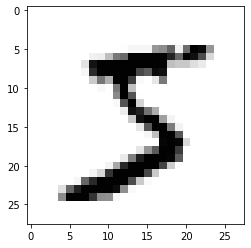

In [11]:
display_image(0)

digit:  5


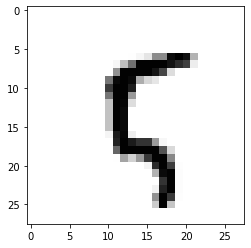

In [12]:
display_image(100)

digit:  3


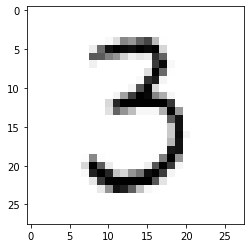

In [13]:
display_image(50)

### KMeans 

##### instantiate a KMeans estimator with 10 clusters cause digits are from 0 to 9  with a 1000 iteration

In [14]:
Kmeans_model = KMeans(n_clusters =10, max_iter = 1000).fit(features)

In [15]:
# cluster centers 
Kmeans_centroids = Kmeans_model.cluster_centers_
Kmeans_centroids


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [16]:
# shape of the centers 
Kmeans_centroids.shape
# notice there is 10 cluster centers and each point has 784 pixel

(10, 784)

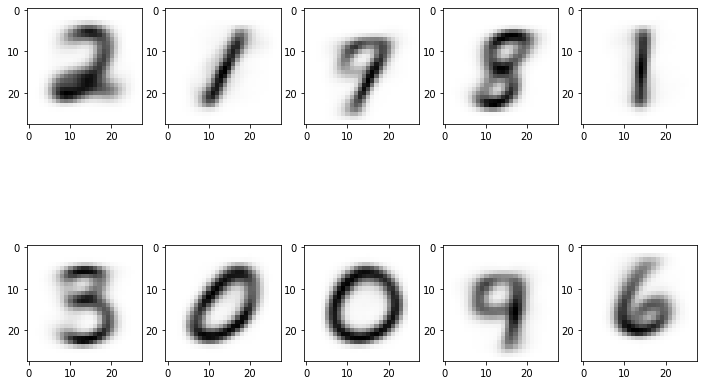

In [18]:
# visualize the cluster centers 
fig,ax = plt.subplots(figsize=(12,8))
for centroid in range (len(Kmeans_centroids)):
    plt.subplot(2, 5, centroid + 1)
    
    plt.imshow(Kmeans_centroids[centroid].reshape(28,28), cmap ='Greys')

In [19]:
np.unique(test_labels.labels_)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [20]:
# test the model on a sample of the data )=

In [21]:
data_test = data.sample(10,replace =False)
test_features = data_test.drop('label' , axis =1)
test_labels = data_test['label']

In [22]:
test_labels

47987    9
45440    9
14937    0
6936     5
19386    3
4846     2
2849     6
39202    0
10468    1
35248    3
Name: label, dtype: int64

In [23]:
#convert the labels from a pandas series to anumpy array 
test_labels = np.array(test_labels)
test_labels

array([9, 9, 0, 5, 3, 2, 6, 0, 1, 3], dtype=int64)

In [24]:
# pass the mnist test features on kmean predict 
pred_clusters = Kmeans_model.predict(test_features)

In [25]:
pred_results = pd.DataFrame({'actual digit ' : test_labels,
                              'pred_cluster' : pred_clusters})
pred_results.head(10)

,actual digit,pred_cluster
0,9,2
1,9,2
2,0,6
3,5,3
4,3,5
5,2,8
6,6,9
7,0,7
8,1,1
9,3,5


##### you can see digit 9 correctly predicted to be in 'cluster 2' represented by image digit 9

##### digit 5 assigned to cluster 3 which was not correct 


![](clusters.PNG)

### MiniBatch Clustering

In [26]:
minibatch_model = MiniBatchKMeans(n_clusters =10, max_iter= 10000, batch_size=100).fit(features)

In [27]:
# cluster centers 
minibatch_centroids = minibatch_model.cluster_centers_
minibatch_centroids.shape


(10, 784)

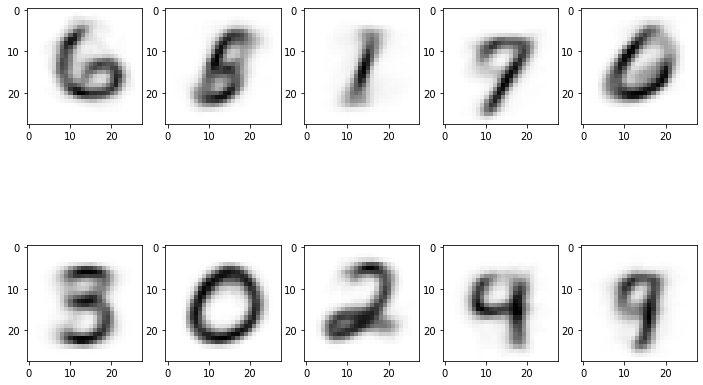

In [28]:
# visualize the cluster centers 
fig,ax = plt.subplots(figsize=(12,8))
for centroid in range (len(minibatch_centroids)):
    plt.subplot(2, 5, centroid + 1)
    
    plt.imshow(minibatch_centroids[centroid].reshape(28,28), cmap ='Greys')

In [ ]:
# this very close to cluster centers produced by kmeans 